In [1]:
#!pwd

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing

sns.set_style('darkgrid')

threshold = 0.2

In [3]:
!ls -li ../../*.csv



76808487 -rw-rw-r-- 1 openuae openuae    1895 Jun 20 12:40 ../../19Jun22_bfr_Vs_after_removingOutliers_alldubai.csv
76808485 -rw-rw-r-- 1 openuae openuae  738762 Jun 20 14:24 ../../19Jun22_perMonth_outliersRemovedByRate.csv
76808488 -rw-rw-r-- 1 openuae openuae    1519 Jun 28 13:45 ../../28Apr_afteroutlier_T_consumption_alldubai.csv
76808610 -rw-rw-r-- 1 openuae openuae 1689689 Jun 28 17:54 ../../byRate_dataset_T_C_E_P_B.csv
76808496 -rw-rw-r-- 1 openuae openuae 1347164 Jun 28 17:54 ../../byRate_dataset_T_C_E_P.csv
76808492 -rw-rw-r-- 1 openuae openuae  848953 Jun 20 14:40 ../../Modified_19Jun22_perMonth_outliersRemovedByRate.csv


In [4]:
OriginalDataset = pd.read_csv('../../byRate_dataset_T_C_E_P_B.csv', index_col=0)

OriginalDataset

,Key,calendar_month,community,year,totalConsumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,...,One Storey Building,Multi-Storey Building,Multi-Storey Ratio Building,Private Villa,Investment Villa,Arabic House,Public Building,Industrial Building,Other Buildings,Total Buildings
0,201706-111,201706,111.0,2017,1.628582e+06,39,0,0,0,0,...,0,2,0,0,0,0,4,0,0,6
1,201706-112,201706,112.0,2017,9.845628e+06,2800,16,0,0,0,...,0,204,0,0,0,12,185,0,0,401
2,201706-113,201706,113.0,2017,1.634600e+07,3428,12,0,0,0,...,0,307,0,0,0,21,55,0,0,383
3,201706-114,201706,114.0,2017,6.814790e+06,2760,2,0,0,0,...,0,174,0,0,0,1,157,0,0,332
4,201706-115,201706,115.0,2017,4.081415e+06,1241,0,0,0,0,...,0,73,0,0,0,0,33,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,202012-961,202012,961.0,2020,4.580300e+06,5,22,0,0,0,...,51,2,0,18,13,0,5,0,3,92
8246,202012-967,202012,967.0,2020,5.451600e+05,3,0,0,0,0,...,1,0,0,3,0,0,5,0,5,14
8247,202012-971,202012,971.0,2020,2.774200e+05,2,0,0,0,0,...,0,0,0,1,0,0,7,0,3,11
8248,202012-981,202012,981.0,2020,5.000000e+02,0,1,0,0,0,...,8,1,0,4,0,0,6,0,1,20


In [5]:
#OriginalDataset = OriginalDataset.drop(['Afr'], axis =1 )
OriginalDataset['month']= 1+(-1*np.cos((OriginalDataset['month']-1)*(2.*np.pi/12)))
OriginalDataset.iloc[0]

Key                              201706-111
calendar_month                       201706
community                             111.0
year                                   2017
totalConsumption               1628582.3335
NumOfConnected-COMMWTR                   39
NumOfConnected-RESINATW                   0
NumOfConnected-RESINATSW                  0
NumOfConnected-INDTWTR                    0
NumOfConnected-FREENRESIW                 0
NumOfConnected-GOVTWTR                    4
NumOfConnected-FREERESIW                  0
NumOfConnected-ENORATE                    0
NumOfConnected-TOTAL                     43
NumOfConnected-RESIEXPW                 0.0
month                              1.866025
Bfr_1                            201705-111
Bfr_3                            201703-111
Bfr_5                            201701-111
temp                                   36.6
prec                                    0.0
prec_days_1mm                             0
prec_days_0.1mm                 

## Remove unnecessary 

In [6]:
to_Exclude= ['prec_days_1mm', 'prec_days_0.1mm']
if "Community Name" in OriginalDataset.columns:
    to_Exclude.append("Community Name")
Dataset = OriginalDataset.drop(to_Exclude,  axis=1)
Dataset_key = Dataset.set_index('Key')

## Rename the remaining

In [7]:
columnsNames = {
  'community': 'communityID',
    "totalConsumption":"T_Consumption",
    "Holy_days":"No_of_OccDays", 
    "occasion":"Occasion", 
    "School or not":"SchoolExist",
    "days storm":"DaysStorm",
    "days fog":"DaysFog",
    "temp":"Temp",    
    "prec":"Prec",
    "One Storey Building":"No#_OneStoreyBuilding", 
    "Multi-Storey Building":"No#_Multi-StoreyBuilding", 
    "Multi-Storey Ratio Building":"No#_MultiStoreyRatioBuilding", 
    "Private Villa"  :"No#_Private_Villa", 
    'Other Buildings':"No#_OtherBuildings", 
    "Industrial Building":"No#_IndustrialBuilding", 
    "Investment Villa":"No#_InvestmentVilla", 
    'Arabic House'    :"No#_ArabicHouse", 
    'Public Building' :'No#_PublicBuilding',
    "Total Buildings" :"No#_TotalBuildings" 
}
Dataset = Dataset.rename(columns=columnsNames)
print(Dataset.shape)
print(Dataset.iloc[0])
Dataset.columns

(8250, 39)
Key                               201706-111
calendar_month                        201706
communityID                            111.0
year                                    2017
T_Consumption                   1628582.3335
NumOfConnected-COMMWTR                    39
NumOfConnected-RESINATW                    0
NumOfConnected-RESINATSW                   0
NumOfConnected-INDTWTR                     0
NumOfConnected-FREENRESIW                  0
NumOfConnected-GOVTWTR                     4
NumOfConnected-FREERESIW                   0
NumOfConnected-ENORATE                     0
NumOfConnected-TOTAL                      43
NumOfConnected-RESIEXPW                  0.0
month                               1.866025
Bfr_1                             201705-111
Bfr_3                             201703-111
Bfr_5                             201701-111
Temp                                    36.6
Prec                                     0.0
DaysStorm                                  0

Index(['Key', 'calendar_month', 'communityID', 'year', 'T_Consumption',
       'NumOfConnected-COMMWTR', 'NumOfConnected-RESINATW',
       'NumOfConnected-RESINATSW', 'NumOfConnected-INDTWTR',
       'NumOfConnected-FREENRESIW', 'NumOfConnected-GOVTWTR',
       'NumOfConnected-FREERESIW', 'NumOfConnected-ENORATE',
       'NumOfConnected-TOTAL', 'NumOfConnected-RESIEXPW', 'month', 'Bfr_1',
       'Bfr_3', 'Bfr_5', 'Temp', 'Prec', 'DaysStorm', 'DaysFog', 'SchoolExist',
       'WorkFromHome', 'Occasion', 'No_of_OccDays', 'Humidity', 'Population',
       'No#_OneStoreyBuilding', 'No#_Multi-StoreyBuilding',
       'No#_MultiStoreyRatioBuilding', 'No#_Private_Villa',
       'No#_InvestmentVilla', 'No#_ArabicHouse', 'No#_PublicBuilding',
       'No#_IndustrialBuilding', 'No#_OtherBuildings', 'No#_TotalBuildings'],
      dtype='object')

In [8]:
dataset_all = Dataset.copy()
dataset_all.calendar_month = pd.to_datetime(dataset_all.calendar_month,format= "%Y%m")
dataset_all

,Key,calendar_month,communityID,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,...,No#_OneStoreyBuilding,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings
0,201706-111,2017-06-01,111.0,2017,1.628582e+06,39,0,0,0,0,...,0,2,0,0,0,0,4,0,0,6
1,201706-112,2017-06-01,112.0,2017,9.845628e+06,2800,16,0,0,0,...,0,204,0,0,0,12,185,0,0,401
2,201706-113,2017-06-01,113.0,2017,1.634600e+07,3428,12,0,0,0,...,0,307,0,0,0,21,55,0,0,383
3,201706-114,2017-06-01,114.0,2017,6.814790e+06,2760,2,0,0,0,...,0,174,0,0,0,1,157,0,0,332
4,201706-115,2017-06-01,115.0,2017,4.081415e+06,1241,0,0,0,0,...,0,73,0,0,0,0,33,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,202012-961,2020-12-01,961.0,2020,4.580300e+06,5,22,0,0,0,...,51,2,0,18,13,0,5,0,3,92
8246,202012-967,2020-12-01,967.0,2020,5.451600e+05,3,0,0,0,0,...,1,0,0,3,0,0,5,0,5,14
8247,202012-971,2020-12-01,971.0,2020,2.774200e+05,2,0,0,0,0,...,0,0,0,1,0,0,7,0,3,11
8248,202012-981,2020-12-01,981.0,2020,5.000000e+02,0,1,0,0,0,...,8,1,0,4,0,0,6,0,1,20


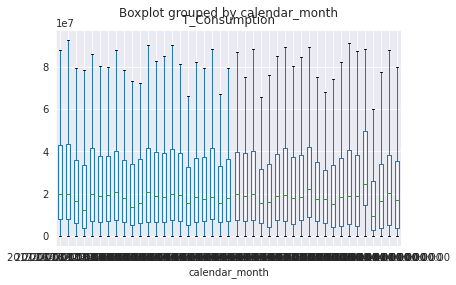

In [9]:
ax = dataset_all.boxplot(column='T_Consumption', by='calendar_month', showfliers=False, 
                positions=range(dataset_all.calendar_month.unique().shape[0]))


## Scalling data 

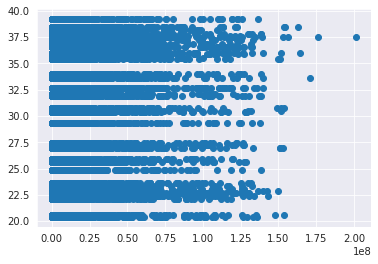

In [10]:
plt.scatter(dataset_all['T_Consumption'], dataset_all['Temp'])

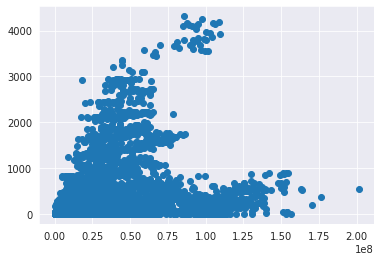

In [11]:
plt.scatter(dataset_all['T_Consumption'], dataset_all['NumOfConnected-RESINATW'])

Text(0.5, 1.0, 'Shows the general trend in all the communities')

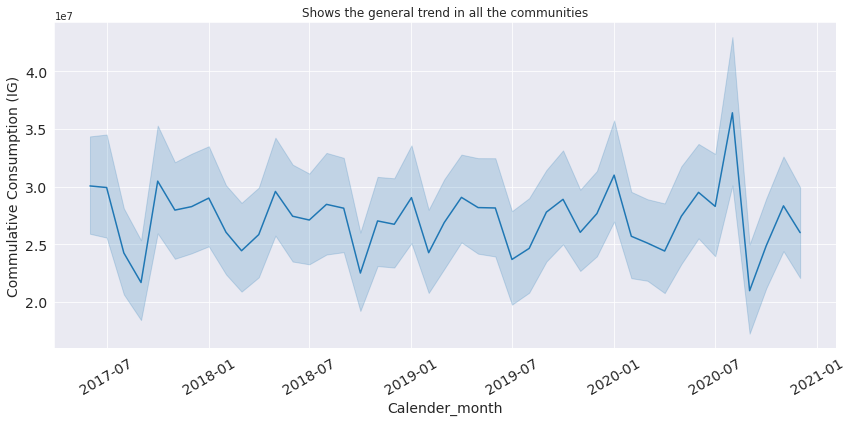

In [12]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.lineplot( x="calendar_month",y="T_Consumption", data=dataset_all, palette="Set3", ax=axe)
plt.xticks( fontsize=14, rotation=30)
plt.yticks( fontsize=14)
plt.xlabel("Calender_month", fontsize=14)
plt.ylabel("Commulative Consumption (IG)", fontsize=14)
plt.title('Shows the general trend in all the communities')

In [13]:
data_to_plot=dataset_all[["Key", "calendar_month", "T_Consumption"]]
data_to_plot=data_to_plot.groupby('calendar_month').sum().reset_index()
data_to_plot.head()

,calendar_month,T_Consumption
0,2017-06-01,5.500317e+09
1,2017-07-01,5.505112e+09
2,2017-08-01,4.459913e+09
3,2017-09-01,4.008513e+09
4,2017-10-01,5.637487e+09


Text(0.5, 1.0, 'Shows the general trend in all the communities')

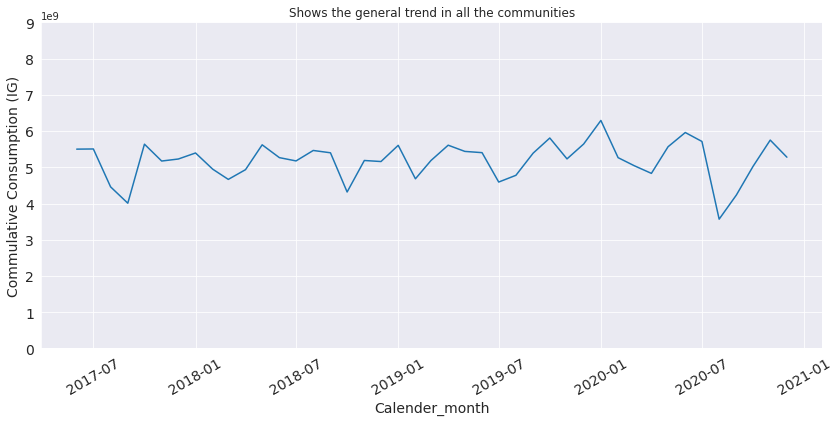

In [14]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.lineplot( x="calendar_month",y="T_Consumption", data=data_to_plot, palette="Set3", ax=axe)
plt.xticks( fontsize=14, rotation=30)
plt.yticks( fontsize=14)
plt.ylim(0, 9000000000)
plt.xlabel("Calender_month", fontsize=14)
plt.ylabel("Commulative Consumption (IG)", fontsize=14)
plt.title('Shows the general trend in all the communities')

Text(0.5, 0, 'Water Consumption (MG)')

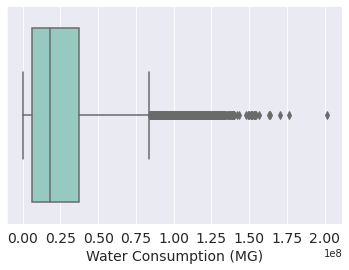

In [15]:
ax = sns.boxplot(x=dataset_all["T_Consumption"],palette="Set3")
#Now, removing the extreme values
ax.set(xlabel="Water Consumption (MG)")
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel("Water Consumption (MG)", fontsize=14)

In [16]:
#Removing the uper and lower 1% values
"""
q_low = dataset_all["T_Consumption"].quantile(0.01)
q_hi  = dataset_all["T_Consumption"].quantile(0.99)
q_hi
dataset_all_filtered = dataset_all[ ((dataset_all["T_Consumption"] < q_hi) 
                                       & (dataset_all["T_Consumption"] > q_low) )]
ax = sns.boxplot(x=dataset_all_filtered["T_Consumption"],palette="Set3")
ax.set(xlabel="Water Consumption (MG)")

plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel("Water Consumption (MG)", fontsize=14)
"""
dataset_all_filtered = dataset_all.copy()
dataset_all_filtered.shape

(8250, 39)

In [17]:
data_to_plot_2=dataset_all_filtered[["Key", "calendar_month", "T_Consumption"]]
data_to_plot_2=data_to_plot_2.groupby('calendar_month').sum().reset_index()
data_to_plot_2.rename(columns={'T_Consumption':'F_totalConsumption'}, inplace=True)
data_to_plot_2 =pd.merge(data_to_plot, data_to_plot_2, how='left', on='calendar_month')
data_to_plot_2= data_to_plot_2.set_index("calendar_month")
data_to_plot_2.to_csv('28Apr_afteroutlier_T_consumption_alldubai.csv')

Text(0, 0.5, 'Commulative Consumption (IG)')

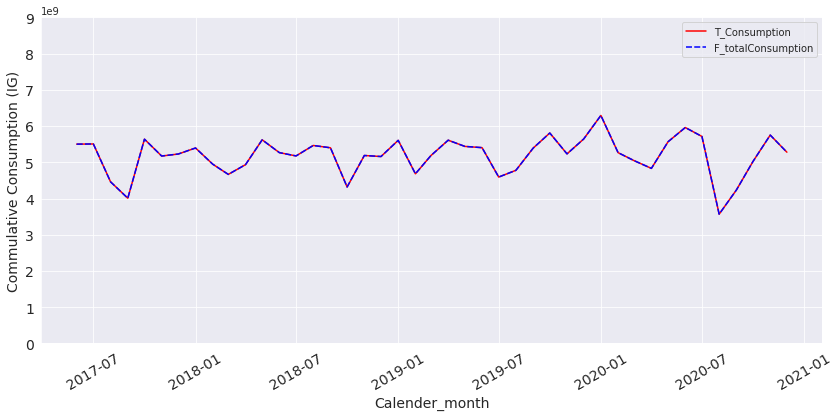

In [18]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.lineplot(  data=data_to_plot_2 , palette=['red', 'blue'], ax=axe)
plt.xticks( fontsize=14, rotation=30)
plt.yticks( fontsize=14)
plt.ylim(0,9000000000)
plt.xlabel("Calender_month", fontsize=14)
plt.ylabel("Commulative Consumption (IG)", fontsize=14)

## Data processing

In [19]:
dataset_all_filtered.columns

Index(['Key', 'calendar_month', 'communityID', 'year', 'T_Consumption',
       'NumOfConnected-COMMWTR', 'NumOfConnected-RESINATW',
       'NumOfConnected-RESINATSW', 'NumOfConnected-INDTWTR',
       'NumOfConnected-FREENRESIW', 'NumOfConnected-GOVTWTR',
       'NumOfConnected-FREERESIW', 'NumOfConnected-ENORATE',
       'NumOfConnected-TOTAL', 'NumOfConnected-RESIEXPW', 'month', 'Bfr_1',
       'Bfr_3', 'Bfr_5', 'Temp', 'Prec', 'DaysStorm', 'DaysFog', 'SchoolExist',
       'WorkFromHome', 'Occasion', 'No_of_OccDays', 'Humidity', 'Population',
       'No#_OneStoreyBuilding', 'No#_Multi-StoreyBuilding',
       'No#_MultiStoreyRatioBuilding', 'No#_Private_Villa',
       'No#_InvestmentVilla', 'No#_ArabicHouse', 'No#_PublicBuilding',
       'No#_IndustrialBuilding', 'No#_OtherBuildings', 'No#_TotalBuildings'],
      dtype='object')

In [20]:
dataset_all_filtered.T_Consumption.describe()

count    8.250000e+03
mean     2.702178e+07
std      2.884008e+07
min      1.000000e+01
25%      6.273341e+06
50%      1.794191e+07
75%      3.736294e+07
max      2.014831e+08
Name: T_Consumption, dtype: float64

In [21]:
dataset_all_scalled = dataset_all_filtered.copy()
dataset_all_scalled.replace({"Occasion": {'Ramadan ': 3, 'Eid': 2, '0':1}}, inplace=True)

col_names_withScaledData =[
 'T_Consumption',
 'NumOfConnected-COMMWTR',
 'NumOfConnected-RESINATW',
 'NumOfConnected-RESIEXPW',
 'NumOfConnected-RESINATSW',
 'NumOfConnected-INDTWTR',
 'NumOfConnected-FREENRESIW',
 'NumOfConnected-GOVTWTR',
 'NumOfConnected-FREERESIW',
 'NumOfConnected-TOTAL',
 'Temp',
 'Prec',
 'SchoolExist',
 'WorkFromHome',
 'Occasion',
 'Humidity',
]
if ('Population' in dataset_all_scalled.columns):
    col_names_withScaledData.append('Population')
    
extra_Cols = ['No#_OneStoreyBuilding',
 'No#_Multi-StoreyBuilding',
 'No#_MultiStoreyRatioBuilding',
 'No#_Private_Villa',
 'No#_InvestmentVilla',
 'No#_ArabicHouse',
 'No#_PublicBuilding',
 'No#_IndustrialBuilding',
 'No#_OtherBuildings',
 'No#_TotalBuildings']
if ('No#_OneStoreyBuilding' in dataset_all_scalled.columns):
    for i in extra_Cols:
        col_names_withScaledData.append(i)
col_names_withScaledData

col_names_withDaysData=[
    'DaysStorm',
     'DaysFog',
    'No_of_OccDays',]

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

for col in col_names_withScaledData:
    dataset_all_scalled[[col]] =  min_max_scaler.fit_transform(dataset_all_scalled[[col]])

for col in col_names_withDaysData:
    dataset_all_scalled[[col]] = dataset_all_scalled[[col]]/30

dataset_all_scalled.head()

,Key,calendar_month,communityID,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,...,No#_OneStoreyBuilding,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings
0,201706-111,2017-06-01,111.0,2017,0.008083,0.003158,0.000000,0.0,0.0,0.0,...,0.0,0.002809,0.0,0.0,0.0,0.000000,0.006757,0.0,0.0,0.000634
1,201706-112,2017-06-01,112.0,2017,0.048866,0.226739,0.003711,0.0,0.0,0.0,...,0.0,0.286517,0.0,0.0,0.0,0.013274,0.312500,0.0,0.0,0.042353
2,201706-113,2017-06-01,113.0,2017,0.081128,0.277593,0.002783,0.0,0.0,0.0,...,0.0,0.431180,0.0,0.0,0.0,0.023230,0.092905,0.0,0.0,0.040452
3,201706-114,2017-06-01,114.0,2017,0.033823,0.223500,0.000464,0.0,0.0,0.0,...,0.0,0.244382,0.0,0.0,0.0,0.001106,0.265203,0.0,0.0,0.035065
4,201706-115,2017-06-01,115.0,2017,0.020257,0.100494,0.000000,0.0,0.0,0.0,...,0.0,0.102528,0.0,0.0,0.0,0.000000,0.055743,0.0,0.0,0.011196


In [22]:
list(dataset_all_scalled.columns)

['Key',
 'calendar_month',
 'communityID',
 'year',
 'T_Consumption',
 'NumOfConnected-COMMWTR',
 'NumOfConnected-RESINATW',
 'NumOfConnected-RESINATSW',
 'NumOfConnected-INDTWTR',
 'NumOfConnected-FREENRESIW',
 'NumOfConnected-GOVTWTR',
 'NumOfConnected-FREERESIW',
 'NumOfConnected-ENORATE',
 'NumOfConnected-TOTAL',
 'NumOfConnected-RESIEXPW',
 'month',
 'Bfr_1',
 'Bfr_3',
 'Bfr_5',
 'Temp',
 'Prec',
 'DaysStorm',
 'DaysFog',
 'SchoolExist',
 'WorkFromHome',
 'Occasion',
 'No_of_OccDays',
 'Humidity',
 'Population',
 'No#_OneStoreyBuilding',
 'No#_Multi-StoreyBuilding',
 'No#_MultiStoreyRatioBuilding',
 'No#_Private_Villa',
 'No#_InvestmentVilla',
 'No#_ArabicHouse',
 'No#_PublicBuilding',
 'No#_IndustrialBuilding',
 'No#_OtherBuildings',
 'No#_TotalBuildings']

In [23]:
columnsLeft = ['calendar_month', 'communityID', 'year', 'month']

dataset_all_scalled[columnsLeft].describe()

,communityID,year,month
count,8250.000000,8250.000000,8250.000000
mean,447.493818,2018.690667,1.029203
std,237.563397,1.043866,0.707982
min,101.000000,2017.000000,0.000000
25%,266.000000,2018.000000,0.500000
50%,367.000000,2019.000000,1.000000
75%,624.000000,2020.000000,1.866025
max,987.000000,2020.000000,2.000000


In [24]:
dataset_all_scalled[columnsLeft]

,calendar_month,communityID,year,month
0,2017-06-01,111.0,2017,1.866025
1,2017-06-01,112.0,2017,1.866025
2,2017-06-01,113.0,2017,1.866025
3,2017-06-01,114.0,2017,1.866025
4,2017-06-01,115.0,2017,1.866025
...,...,...,...,...
8245,2020-12-01,961.0,2020,0.133975
8246,2020-12-01,967.0,2020,0.133975
8247,2020-12-01,971.0,2020,0.133975
8248,2020-12-01,981.0,2020,0.133975


In [25]:
dataset_all_scalled.dtypes

Key                                     object
calendar_month                  datetime64[ns]
communityID                            float64
year                                     int64
T_Consumption                          float64
NumOfConnected-COMMWTR                 float64
NumOfConnected-RESINATW                float64
NumOfConnected-RESINATSW               float64
NumOfConnected-INDTWTR                 float64
NumOfConnected-FREENRESIW              float64
NumOfConnected-GOVTWTR                 float64
NumOfConnected-FREERESIW               float64
NumOfConnected-ENORATE                   int64
NumOfConnected-TOTAL                   float64
NumOfConnected-RESIEXPW                float64
month                                  float64
Bfr_1                                   object
Bfr_3                                   object
Bfr_5                                   object
Temp                                   float64
Prec                                   float64
DaysStorm    

In [26]:
dataset_all_scalled

,Key,calendar_month,communityID,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,...,No#_OneStoreyBuilding,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings
0,201706-111,2017-06-01,111.0,2017,0.008083,0.003158,0.000000,0.0,0.0,0.0,...,0.000000,0.002809,0.0,0.000000,0.000000,0.000000,0.006757,0.0,0.000000,0.000634
1,201706-112,2017-06-01,112.0,2017,0.048866,0.226739,0.003711,0.0,0.0,0.0,...,0.000000,0.286517,0.0,0.000000,0.000000,0.013274,0.312500,0.0,0.000000,0.042353
2,201706-113,2017-06-01,113.0,2017,0.081128,0.277593,0.002783,0.0,0.0,0.0,...,0.000000,0.431180,0.0,0.000000,0.000000,0.023230,0.092905,0.0,0.000000,0.040452
3,201706-114,2017-06-01,114.0,2017,0.033823,0.223500,0.000464,0.0,0.0,0.0,...,0.000000,0.244382,0.0,0.000000,0.000000,0.001106,0.265203,0.0,0.000000,0.035065
4,201706-115,2017-06-01,115.0,2017,0.020257,0.100494,0.000000,0.0,0.0,0.0,...,0.000000,0.102528,0.0,0.000000,0.000000,0.000000,0.055743,0.0,0.000000,0.011196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,202012-961,2020-12-01,961.0,2020,0.022733,0.000405,0.005102,0.0,0.0,0.0,...,0.240566,0.002809,0.0,0.007151,0.001565,0.000000,0.008446,0.0,0.006160,0.009717
8246,202012-967,2020-12-01,967.0,2020,0.002706,0.000243,0.000000,0.0,0.0,0.0,...,0.004717,0.000000,0.0,0.001192,0.000000,0.000000,0.008446,0.0,0.010267,0.001479
8247,202012-971,2020-12-01,971.0,2020,0.001377,0.000162,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000397,0.000000,0.000000,0.011824,0.0,0.006160,0.001162
8248,202012-981,2020-12-01,981.0,2020,0.000002,0.000000,0.000232,0.0,0.0,0.0,...,0.037736,0.001404,0.0,0.001589,0.000000,0.000000,0.010135,0.0,0.002053,0.002112


## Add the previous consumption 


In [27]:
dataset_all_scalled_work =  dataset_all_scalled.set_index('Key')
dataset_all_scalled_work

,calendar_month,communityID,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,NumOfConnected-GOVTWTR,...,No#_OneStoreyBuilding,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings
Key,,,,,,,,,,,,,,,,,,,,,
201706-111,2017-06-01,111.0,2017,0.008083,0.003158,0.000000,0.0,0.0,0.0,0.042553,...,0.000000,0.002809,0.0,0.000000,0.000000,0.000000,0.006757,0.0,0.000000,0.000634
201706-112,2017-06-01,112.0,2017,0.048866,0.226739,0.003711,0.0,0.0,0.0,0.212766,...,0.000000,0.286517,0.0,0.000000,0.000000,0.013274,0.312500,0.0,0.000000,0.042353
201706-113,2017-06-01,113.0,2017,0.081128,0.277593,0.002783,0.0,0.0,0.0,0.000000,...,0.000000,0.431180,0.0,0.000000,0.000000,0.023230,0.092905,0.0,0.000000,0.040452
201706-114,2017-06-01,114.0,2017,0.033823,0.223500,0.000464,0.0,0.0,0.0,0.063830,...,0.000000,0.244382,0.0,0.000000,0.000000,0.001106,0.265203,0.0,0.000000,0.035065
201706-115,2017-06-01,115.0,2017,0.020257,0.100494,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.102528,0.0,0.000000,0.000000,0.000000,0.055743,0.0,0.000000,0.011196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202012-961,2020-12-01,961.0,2020,0.022733,0.000405,0.005102,0.0,0.0,0.0,0.042553,...,0.240566,0.002809,0.0,0.007151,0.001565,0.000000,0.008446,0.0,0.006160,0.009717
202012-967,2020-12-01,967.0,2020,0.002706,0.000243,0.000000,0.0,0.0,0.0,0.031915,...,0.004717,0.000000,0.0,0.001192,0.000000,0.000000,0.008446,0.0,0.010267,0.001479
202012-971,2020-12-01,971.0,2020,0.001377,0.000162,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000397,0.000000,0.000000,0.011824,0.0,0.006160,0.001162


In [28]:
bfr_values = dataset_all_scalled_work.Bfr_1.values
prevConsump = []
for i in bfr_values:
    value = None
    try:
        value = dataset_all_scalled_work.loc[i, 'T_Consumption']
    except:
        pass
    prevConsump.append(value)
    
dataset_all_scalled_work['preConsump_1'] = prevConsump

In [29]:
dataset_all_scalled_ready = dataset_all_scalled_work[~dataset_all_scalled_work.preConsump_1.isna()]
#dataset_all_scalled_ready = dataset_all_scalled_ready[~dataset_all_scalled_ready.preConsump_3.isna()]
#dataset_all_scalled_ready = dataset_all_scalled_ready[~dataset_all_scalled_ready.preConsump_5.isna()]

In [30]:
dataset_all_scalled_ready.calendar_month

Key
201707-111   2017-07-01
201707-112   2017-07-01
201707-113   2017-07-01
201707-114   2017-07-01
201707-115   2017-07-01
                ...    
202012-961   2020-12-01
202012-967   2020-12-01
202012-971   2020-12-01
202012-981   2020-12-01
202012-987   2020-12-01
Name: calendar_month, Length: 7923, dtype: datetime64[ns]

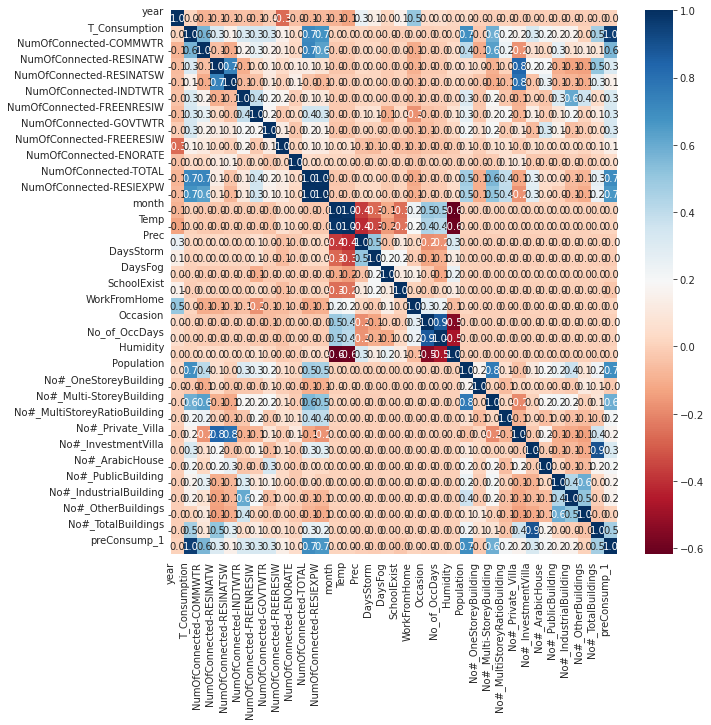

In [31]:
dataset_all_scalled = dataset_all_scalled_ready.drop(['communityID', 'Bfr_1', 'Bfr_3', 'Bfr_5'],axis = 1)

corr = dataset_all_scalled.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".1f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [32]:
listCorr = abs(corr["T_Consumption"])
listCorr.sort_values()

DaysFog                         0.002027
No_of_OccDays                   0.002458
No#_OtherBuildings              0.003398
Occasion                        0.003940
Temp                            0.004089
DaysStorm                       0.004525
month                           0.004802
SchoolExist                     0.007392
year                            0.009315
WorkFromHome                    0.009351
Humidity                        0.009834
Prec                            0.014748
No#_OneStoreyBuilding           0.024487
NumOfConnected-ENORATE          0.036942
NumOfConnected-RESINATSW        0.147723
NumOfConnected-FREERESIW        0.148720
No#_PublicBuilding              0.154279
No#_IndustrialBuilding          0.155810
No#_Private_Villa               0.155872
No#_MultiStoreyRatioBuilding    0.207801
No#_ArabicHouse                 0.212314
NumOfConnected-RESINATW         0.314728
No#_InvestmentVilla             0.319322
NumOfConnected-INDTWTR          0.322307
NumOfConnected-F

In [33]:
X = dataset_all_scalled.loc[:, dataset_all_scalled.columns != 'T_Consumption']  #independent columns
X = X.loc[:, X.columns != 'calendar_month']
y = dataset_all_scalled['T_Consumption']    #target column i.e price range
print(X.shape)
print(y.shape)
print(X.dtypes)

(7923, 33)
(7923,)
year                              int64
NumOfConnected-COMMWTR          float64
NumOfConnected-RESINATW         float64
NumOfConnected-RESINATSW        float64
NumOfConnected-INDTWTR          float64
NumOfConnected-FREENRESIW       float64
NumOfConnected-GOVTWTR          float64
NumOfConnected-FREERESIW        float64
NumOfConnected-ENORATE            int64
NumOfConnected-TOTAL            float64
NumOfConnected-RESIEXPW         float64
month                           float64
Temp                            float64
Prec                            float64
DaysStorm                       float64
DaysFog                         float64
SchoolExist                     float64
WorkFromHome                    float64
Occasion                        float64
No_of_OccDays                   float64
Humidity                        float64
Population                      float64
No#_OneStoreyBuilding           float64
No#_Multi-StoreyBuilding        float64
No#_MultiStoreyRatioB

In [34]:
dataset_all_scalled

,calendar_month,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,NumOfConnected-GOVTWTR,NumOfConnected-FREERESIW,...,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings,preConsump_1
Key,,,,,,,,,,,,,,,,,,,,,
201707-111,2017-07-01,2017,0.007362,0.002996,0.000000,0.0,0.0,0.0,0.042553,0.000000,...,0.002809,0.0,0.000000,0.000000,0.000000,0.006757,0.0,0.000000,0.000634,0.008083
201707-112,2017-07-01,2017,0.047473,0.223176,0.003711,0.0,0.0,0.0,0.212766,0.000000,...,0.286517,0.0,0.000000,0.000000,0.013274,0.312500,0.0,0.000000,0.042353,0.048866
201707-113,2017-07-01,2017,0.077180,0.279375,0.002783,0.0,0.0,0.0,0.000000,0.083333,...,0.431180,0.0,0.000000,0.000000,0.023230,0.092905,0.0,0.000000,0.040452,0.081128
201707-114,2017-07-01,2017,0.033785,0.198235,0.000696,0.0,0.0,0.0,0.063830,0.000000,...,0.244382,0.0,0.000000,0.000000,0.001106,0.265203,0.0,0.000000,0.035065,0.033823
201707-115,2017-07-01,2017,0.020618,0.100413,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.102528,0.0,0.000000,0.000000,0.000000,0.055743,0.0,0.000000,0.011196,0.020257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202012-961,2020-12-01,2020,0.022733,0.000405,0.005102,0.0,0.0,0.0,0.042553,0.000000,...,0.002809,0.0,0.007151,0.001565,0.000000,0.008446,0.0,0.006160,0.009717,0.021323
202012-967,2020-12-01,2020,0.002706,0.000243,0.000000,0.0,0.0,0.0,0.031915,0.000000,...,0.000000,0.0,0.001192,0.000000,0.000000,0.008446,0.0,0.010267,0.001479,0.002628
202012-971,2020-12-01,2020,0.001377,0.000162,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000397,0.000000,0.000000,0.011824,0.0,0.006160,0.001162,0.006150


In [35]:
#Correlation with output variable
cor_target = abs(corr["T_Consumption"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=threshold]  # 0.2 is the threshold 
print(relevant_features.index)
heads_chosen = list(relevant_features.index)
final_dataset  = dataset_all_scalled[heads_chosen].copy()

Index(['T_Consumption', 'NumOfConnected-COMMWTR', 'NumOfConnected-RESINATW',
       'NumOfConnected-INDTWTR', 'NumOfConnected-FREENRESIW',
       'NumOfConnected-GOVTWTR', 'NumOfConnected-TOTAL',
       'NumOfConnected-RESIEXPW', 'Population', 'No#_Multi-StoreyBuilding',
       'No#_MultiStoreyRatioBuilding', 'No#_InvestmentVilla',
       'No#_ArabicHouse', 'No#_TotalBuildings', 'preConsump_1'],
      dtype='object')


In [36]:
X = final_dataset.drop(["T_Consumption"], axis=1)
y = final_dataset[["T_Consumption"]].values.reshape(-1,1)

In [37]:
X

,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,NumOfConnected-GOVTWTR,NumOfConnected-TOTAL,NumOfConnected-RESIEXPW,Population,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_InvestmentVilla,No#_ArabicHouse,No#_TotalBuildings,preConsump_1
Key,,,,,,,,,,,,,,
201707-111,0.002996,0.000000,0.0,0.0,0.042553,0.000565,0.000000,0.007338,0.002809,0.0,0.000000,0.000000,0.000634,0.008083
201707-112,0.223176,0.003711,0.0,0.0,0.212766,0.067857,0.030845,0.029140,0.286517,0.0,0.000000,0.013274,0.042353,0.048866
201707-113,0.279375,0.002783,0.0,0.0,0.000000,0.090269,0.044864,0.065889,0.431180,0.0,0.000000,0.023230,0.040452,0.081128
201707-114,0.198235,0.000696,0.0,0.0,0.063830,0.050081,0.016688,0.011399,0.244382,0.0,0.000000,0.001106,0.035065,0.033823
201707-115,0.100413,0.000000,0.0,0.0,0.000000,0.025606,0.008789,0.014725,0.102528,0.0,0.000000,0.000000,0.011196,0.020257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202012-961,0.000405,0.005102,0.0,0.0,0.042553,0.000466,0.000046,0.003277,0.002809,0.0,0.001565,0.000000,0.009717,0.021323
202012-967,0.000243,0.000000,0.0,0.0,0.031915,0.000085,0.000015,0.000034,0.000000,0.0,0.000000,0.000000,0.001479,0.002628
202012-971,0.000162,0.000000,0.0,0.0,0.000000,0.000014,0.000000,0.000079,0.000000,0.0,0.000000,0.000000,0.001162,0.006150


In [38]:
y

array([[7.36205966e-03],
       [4.74731510e-02],
       [7.71795724e-02],
       ...,
       [1.37684013e-03],
       [2.43196590e-06],
       [3.73679006e-04]])

In [39]:
# Splitting the dataset into the Training set and Test set
## Here we have two ways, Either Go RANDOM or SEQUENTIAL SPLIT
from sklearn.model_selection import train_test_split
split_method="ordered"
if (split_method=="random"):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
else:
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, shuffle=False)

In [40]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (5546, 14)
Shape of X_test:  (2377, 14)
Shape of y_train:  (5546, 1)
Shape of y_test (2377, 1)


In [41]:
from xgboost import XGBClassifier
import xgboost as xgb

In [42]:
import timeit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from datetime import datetime
from sklearn.metrics import r2_score

In [43]:
# Fitting the Random Forest Regression to the dataset
def train_bias_model(Xtr, ytr_pred, ytr):
    ytrErr = ytr - ytr_pred
    print("train_bias_model - Shape of new y_pred" , ytrErr.shape)
    reg_rf =  xgb.XGBRegressor(objective ='reg:squarederror', 
                          #colsample_bytree = 0.3,
                          learning_rate = 0.01,
                          max_depth = 5, 
                          alpha = 10,
                          n_estimators = 1000)
    reg_rf.fit(Xtr, ytrErr.ravel())
    return reg_rf


def testAllModel(actModel, trainedBias, Xts, yts,reshapeACTMODEL = False):
    y_pred=actModel.predict(Xts)
    y_pred_biases = trainedBias.predict(Xts)
    print("testAllModel  ", y_pred.shape, yts.shape, y_pred_biases.shape)
    y_corrected = y_pred_biases  +  y_pred.reshape(1,-1)
    return y_corrected.reshape(-1,1)

In [44]:
def evaluate(y_act,y_pred):
    # Predicting R2 Score the Test set results
    r2_score_test = r2_score(y_act, y_pred)
    # Predicting RMSE the Test set results
    rmse =  (np.sqrt(mean_squared_error(y_act,y_pred)))
    mae = mean_absolute_error(y_act,y_pred)
    med_ae= median_absolute_error(y_act,y_pred)
    mape = mean_absolute_percentage_error(y_act,y_pred)
    print('R2_score: ', r2_score_test, "RMSE: ", rmse, "MAE: ", mae,"MED_AE: ", med_ae,   "MAPE: ", mape) 
    return r2_score_test, rmse, mae, med_ae, mape 

In [45]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

def test_model(Model, X_df, y_act):
    y_pred = Model.predict(X_df)
    from sklearn.metrics import r2_score
    r2_score = r2_score(y_act, y_pred)
    # Predicting RMSE the Test set results
    rmse =  (np.sqrt(mean_squared_error(y_act,y_pred)))
    mae = mean_absolute_error(y_act,y_pred)
    med_ae= median_absolute_error(y_act,y_pred)
    mape = mean_absolute_percentage_error(y_act,y_pred)  
    return r2_score, rmse, mae, med_ae, mape, y_pred

def train_model_linear(X_tr, y_tr):
    Model = LinearRegression()
    start = timeit.default_timer()
    Model.fit(X_tr, y_tr)
    stop = timeit.default_timer()
    trainingTime=(stop - start)*1000
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = Model, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return Model, trainingTime, cv


import lightgbm as lgb
def create_LGB():
    return lgb.LGBMRegressor(
        objective = 'regression', 
        num_leaves= 20,
        min_split_gain=0,
        max_depth=2, 
        learning_rate= 0.5,
        feature_fraction=0.4,
        boosting_type= 'goss', 
        bagging_freq =  10,
        bagging_fraction= 1,
    )


def train_LGB(X_train, y_train):
    # train
    Lgb_model = create_LGB()
    start = timeit.default_timer() ##
    Lgb_model.fit(X_train, y_train.ravel()) 
    stop = timeit.default_timer()
    time_Lgb_model=(stop - start)*1000 ##
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = Lgb_model, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return Lgb_model, time_Lgb_model, cv
       
        
from sklearn.ensemble import GradientBoostingRegressor
def create_GBR():
    return GradientBoostingRegressor(
        n_estimators=200,  #default = 100
        min_samples_split=5, # 2
        max_leaf_nodes=10, #default = None
        max_depth=15, #default = 3
        learning_rate= 0.05 ,#default = 0.1  
        alpha = 0.7
    )



def train_GBR(X_train, y_train):
    GBR_model = create_GBR()
    start = timeit.default_timer() ##
    GBR_model.fit(X_train, y_train)
    stop = timeit.default_timer() ##
    time_GBR_model=(stop - start)*1000 ##   
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = GBR_model, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return GBR_model,  time_GBR_model, cv
    
from xgboost import XGBClassifier
import xgboost as xgb
def create_xgb():
    return xgb.XGBRegressor(
        min_child_weight = 3,
        max_depth = 6,
        learning_rate = 0.1,
        colsample_bytree = 0.5,
    )


def train_xgb(X_train, y_train):
    XGboost = create_xgb()
    start = timeit.default_timer() ##
    XGboost.fit(X_train,y_train)
    stop = timeit.default_timer() ##
    time_XGboost=(stop - start)*1000 ##   
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = XGboost, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return XGboost, time_XGboost, cv


# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
def train_dt (X_train, y_train):
    regressor_dt = DecisionTreeRegressor(random_state = 0)
    start = timeit.default_timer() ##
    regressor_dt.fit(X_train, y_train)
    stop = timeit.default_timer() ##
    time_dt=(stop - start)*1000 ##  
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return regressor_dt, time_dt, cv

# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
def create_rf():
    return RandomForestRegressor(
        n_estimators = 200,
        min_samples_split =10,
        min_samples_leaf =1,
        max_depth = 70, 
        max_features ='sqrt',
        bootstrap = True,
        random_state = 0,
    )

def train_rf(X_train, y_train):
    regressor_rf = create_rf()
    start = timeit.default_timer() ##
    regressor_rf.fit(X_train, y_train.ravel())
    stop = timeit.default_timer() ##
    time_rf=(stop - start)*1000 ##
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return  regressor_rf, time_rf, cv
    
    

from sklearn.neural_network import MLPRegressor
def create_nn():
    return MLPRegressor(
        n_iter_no_change=500,
        max_iter=2000,
        random_state=0,
        verbose=False,
        hidden_layer_sizes=(300, 150, 50),
        alpha=0.01,) 


def train_nn(X_train, y_train):
    regressor_nn =create_nn()
    start = timeit.default_timer() ##
    regressor_nn.fit(X_train, y_train.ravel())
    stop = timeit.default_timer() ##
    time_nn=(stop - start)*1000 ##  
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = regressor_nn, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return regressor_nn, time_nn, cv


## Linear Regression

In [46]:
columns_ = ['Time_Train', 'CV_5',
           'R2_Score_Train','RMSE_Train','MAE_Train', 'MdAE_Train', 'MAPE_Train',
           'R2_Score_Test','RMSE_Test','MAE_Test', 'MdAE_Test', 'MAPE_Test']
index_=[ "LR", "DT", "RF", "NN", "XGB", "LGB", "GBR", "STK"]
df_results = pd.DataFrame(columns=columns_, index = index_)

Time_Train                20.754565
CV_5                       0.934509
R2_Score_Train             0.932325
RMSE_Train                 0.036875
MAE_Train                   0.01978
MdAE_Train                 0.009716
MAPE_Train        1437010191.809778
R2_Score_Test              0.905548
RMSE_Test                  0.045135
MAE_Test                   0.025148
MdAE_Test                  0.011592
MAPE_Test                  9.853659
Name: LR, dtype: object


Text(0.5, 0.98, 'LR')

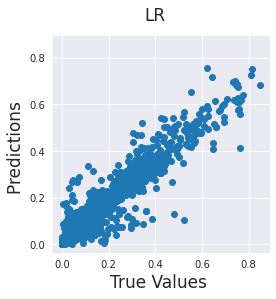

In [47]:
modelName = "LR"    #<--------------------
Arr = []
linear_model, _time, _cv = train_model_linear (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(linear_model, X_train, y_train) #<-----------
res2= test_model(linear_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_linear_train = res[-1]            #<--------------------
y_pred_linear_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_linear_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

Time_Train        114.665867
CV_5                0.903452
R2_Score_Train           1.0
RMSE_Train               0.0
MAE_Train                0.0
MdAE_Train               0.0
MAPE_Train          0.000657
R2_Score_Test       0.787551
RMSE_Test           0.067692
MAE_Test            0.037411
MdAE_Test           0.017141
MAPE_Test           5.662369
Name: DT, dtype: object


Text(0.5, 0.98, 'DT')

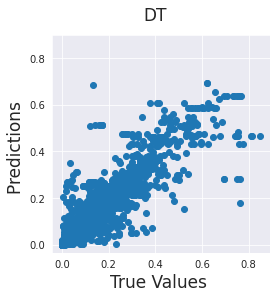

In [48]:
modelName = "DT"    #<--------------------
Arr = []
dt_model, _time, _cv = train_dt(X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(dt_model, X_train, y_train) #<-----------
res2= test_model(dt_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_dt_train = res[-1]         #<--------------------
y_pred_dt_test = res2[-1]         #<--------------------

df_results.loc[modelName] = Arr
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_dt_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

Time_Train            1703.010413
CV_5                     0.955296
R2_Score_Train           0.982731
RMSE_Train               0.018627
MAE_Train                 0.00992
MdAE_Train               0.004561
MAPE_Train        29042518.527675
R2_Score_Test            0.799482
RMSE_Test                0.065764
MAE_Test                 0.034813
MdAE_Test                0.014857
MAPE_Test                13.49366
Name: RF, dtype: object


Text(0.5, 0.98, 'RF')

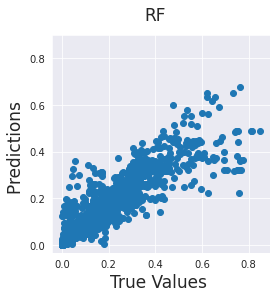

In [49]:
modelName = "RF"    #<--------------------
Arr = []
rf_model, _time, _cv = train_rf(X_train, y_train)   #<---2
Arr.extend([_time, _cv])

res = test_model(rf_model, X_train, y_train) #<-----------
res2= test_model(rf_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_rf_train = res[-1]      #<--------------------
y_pred_rf_test = res2[-1]      #<--------------------

df_results.loc[modelName] = Arr
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_rf_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

Time_Train            240816.130977
CV_5                       0.941986
R2_Score_Train             0.955253
RMSE_Train                 0.029984
MAE_Train                  0.017015
MdAE_Train                 0.008843
MAPE_Train        2983515964.708644
R2_Score_Test              0.884278
RMSE_Test                  0.049959
MAE_Test                     0.0288
MdAE_Test                  0.014047
MAPE_Test                 14.568279
Name: NN, dtype: object


Text(0.5, 0.98, 'NN')

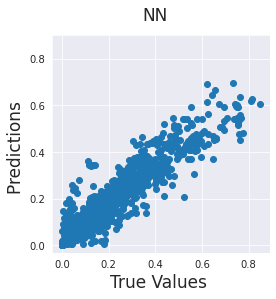

In [50]:
modelName = "NN"    #<--------------------
Arr = []
nn_model, _time, _cv = train_nn (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(nn_model, X_train, y_train) #<-----------
res2= test_model(nn_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_nn_train = res[-1]            #<--------------------
y_pred_nn_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_nn_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

Time_Train              2507.629826
CV_5                       0.949848
R2_Score_Train             0.981839
RMSE_Train                 0.019102
MAE_Train                  0.011843
MdAE_Train                 0.006484
MAPE_Train        1405546176.995237
R2_Score_Test              0.831925
RMSE_Test                  0.060209
MAE_Test                   0.031271
MdAE_Test                  0.012449
MAPE_Test                  9.280895
Name: XGB, dtype: object


Text(0.5, 0.98, 'XGB')

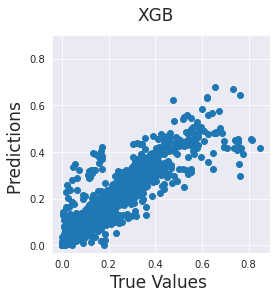

In [51]:
modelName = "XGB"    #<--------------------
Arr = []
xgb_model, _time, _cv = train_xgb (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(xgb_model, X_train, y_train) #<-----------
res2= test_model(xgb_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_xgb_train = res[-1]            #<--------------------
y_pred_xgb_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_xgb_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

/home/openuae/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Time_Train              3290.196913
CV_5                       0.946655
R2_Score_Train             0.970389
RMSE_Train                 0.024391
MAE_Train                   0.01492
MdAE_Train                 0.007856
MAPE_Train        2875806728.590448
R2_Score_Test              0.855556
RMSE_Test                  0.055816
MAE_Test                   0.027721
MdAE_Test                  0.010478
MAPE_Test                 16.367884
Name: GBR, dtype: object


Text(0.5, 0.98, 'GBR')

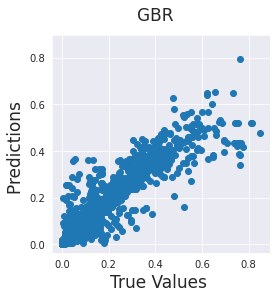

In [52]:
modelName = "GBR"  #<--------------------
Arr = []
GBR_model, _time, _cv = train_GBR (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(GBR_model, X_train, y_train) #<-----------
res2= test_model(GBR_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_GBR_train = res[-1]            #<--------------------
y_pred_GBR_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_GBR_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ig

Text(0.5, 0.98, 'LGB')

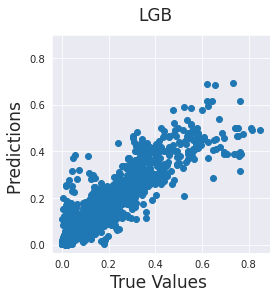

In [53]:
modelName = "LGB"  #<--------------------
Arr = []
LGB_model, _time, _cv = train_LGB (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(LGB_model, X_train, y_train) #<-----------
res2= test_model(LGB_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_LGB_train = res[-1]            #<--------------------
y_pred_LGB_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_LGB_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

# Bias Model

In [54]:
columns_ = ['R2_Score_Train','RMSE_Train','MAE_Train', 'MdAE_Train', 'MAPE_Train',
           'R2_Score_Test','RMSE_Test','MAE_Test', 'MdAE_Test', 'MAPE_Test']
index_=[ "LR", "DT", "RF", "NN", "XGB", "LGB", "GBR", "STK"]
df_modified_results = pd.DataFrame(columns=columns_, index = index_)

## LightGBM

In [55]:
modelName = "LGB" #<-----------------

Arr = []
LGB_Bias = train_bias_model(X_train,  y_pred_LGB_train.reshape(-1,1), y_train)  #<-----------------
res = evaluate(y_train,testAllModel(LGB_model, LGB_Bias, X_train, y_train)) #<-----------------
y_pred_lgb_bias  =   testAllModel(LGB_model, LGB_Bias, X_test, y_test)      #<----------------- 
res2 = evaluate(y_test,y_pred_lgb_bias)                                     #<-----------------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (5546, 1)
testAllModel   (5546,) (5546, 1) (5546,)
R2_score:  0.9583539933464343 RMSE:  0.0289267955909765 MAE:  0.01708735666888193 MED_AE:  0.009083250454108249 MAPE:  6290679406.588891
testAllModel   (2377,) (2377, 1) (2377,)
R2_score:  0.8272098605801074 RMSE:  0.06104771588476214 MAE:  0.03342707634220715 MED_AE:  0.014180352964643289 MAPE:  29.92893805070221
R2_Score_Train             0.958354
RMSE_Train                 0.028927
MAE_Train                  0.017087
MdAE_Train                 0.009083
MAPE_Train        6290679406.588891
R2_Score_Test               0.82721
RMSE_Test                  0.061048
MAE_Test                   0.033427
MdAE_Test                   0.01418
MAPE_Test                 29.928938
Name: LGB, dtype: object


In [56]:
modelName = "GBR" #<-----------------

Arr = []
GBR_Bias = train_bias_model(X_train,  y_pred_GBR_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(GBR_model, GBR_Bias, X_train, y_train)) #<---------2--------
y_pred_GBR_bias  =   testAllModel(GBR_model, GBR_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_GBR_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (5546, 1)
testAllModel   (5546,) (5546, 1) (5546,)
R2_score:  0.9703564557475455 RMSE:  0.024404994181555915 MAE:  0.015056850843510187 MED_AE:  0.007808064460681684 MAPE:  4191206187.073489
testAllModel   (2377,) (2377, 1) (2377,)
R2_score:  0.8562939312288899 RMSE:  0.055673368160660826 MAE:  0.02777974284991174 MED_AE:  0.00998884931032537 MAPE:  23.430893955801768
R2_Score_Train             0.970356
RMSE_Train                 0.024405
MAE_Train                  0.015057
MdAE_Train                 0.007808
MAPE_Train        4191206187.073489
R2_Score_Test              0.856294
RMSE_Test                  0.055673
MAE_Test                    0.02778
MdAE_Test                  0.009989
MAPE_Test                 23.430894
Name: GBR, dtype: object


In [57]:
modelName = "XGB" #<-----------------

Arr = []
xgb_Bias = train_bias_model(X_train,  y_pred_xgb_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(xgb_model, xgb_Bias, X_train, y_train)) #<---------2--------
y_pred_xgb_bias  =   testAllModel(xgb_model, xgb_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_xgb_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (5546, 1)
testAllModel   (5546,) (5546, 1) (5546,)
R2_score:  0.9817526127888097 RMSE:  0.01914758422594413 MAE:  0.011976338737790665 MED_AE:  0.006729165905272211 MAPE:  2830218183.1678467
testAllModel   (2377,) (2377, 1) (2377,)
R2_score:  0.8339567614319507 RMSE:  0.05984398970267038 MAE:  0.03112018276910569 MED_AE:  0.012470353273427541 MAPE:  16.92593470771359
R2_Score_Train             0.981753
RMSE_Train                 0.019148
MAE_Train                  0.011976
MdAE_Train                 0.006729
MAPE_Train        2830218183.167847
R2_Score_Test              0.833957
RMSE_Test                  0.059844
MAE_Test                    0.03112
MdAE_Test                   0.01247
MAPE_Test                 16.925935
Name: XGB, dtype: object


In [58]:
modelName = "LR" #<-----------------

Arr = []
linear_Bias = train_bias_model(X_train,  y_pred_linear_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(linear_model, linear_Bias, X_train, y_train)) #<---------2--------
y_pred_linear_bias  =   testAllModel(linear_model, linear_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_linear_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (5546, 1)
testAllModel   (5546, 1) (5546, 1) (5546,)
R2_score:  0.9353307079468636 RMSE:  0.03604646642196996 MAE:  0.0195007158560195 MED_AE:  0.0093796210775311 MAPE:  3255904045.668986
testAllModel   (2377, 1) (2377, 1) (2377,)
R2_score:  0.9067055287160878 RMSE:  0.04485779229926484 MAE:  0.025141585669054445 MED_AE:  0.011456496897842929 MAPE:  18.269227295211117
R2_Score_Train             0.935331
RMSE_Train                 0.036046
MAE_Train                  0.019501
MdAE_Train                  0.00938
MAPE_Train        3255904045.668986
R2_Score_Test              0.906706
RMSE_Test                  0.044858
MAE_Test                   0.025142
MdAE_Test                  0.011456
MAPE_Test                 18.269227
Name: LR, dtype: object


In [59]:
modelName = "DT" #<-----------------

Arr = []
dt_Bias = train_bias_model(X_train,  y_pred_dt_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(dt_model, dt_Bias, X_train, y_train)) #<---------2--------
y_pred_dt_bias  =   testAllModel(dt_model, dt_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_dt_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (5546, 1)
testAllModel   (5546,) (5546, 1) (5546,)
R2_score:  0.9998342967104067 RMSE:  0.0018246484802722234 MAE:  0.0018246484687551856 MED_AE:  0.0018246484687551856 MAPE:  1481696030.9188223
testAllModel   (2377,) (2377, 1) (2377,)
R2_score:  0.7889633324119907 RMSE:  0.06746661207771257 MAE:  0.037298230579045126 MED_AE:  0.017102341382102815 MAPE:  13.590764922926601
R2_Score_Train             0.999834
RMSE_Train                 0.001825
MAE_Train                  0.001825
MdAE_Train                 0.001825
MAPE_Train        1481696030.918822
R2_Score_Test              0.788963
RMSE_Test                  0.067467
MAE_Test                   0.037298
MdAE_Test                  0.017102
MAPE_Test                 13.590765
Name: DT, dtype: object


In [ ]:
modelName = "RF" #<-----------------

Arr = []
rf_Bias = train_bias_model(X_train,  y_pred_rf_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(rf_model, rf_Bias, X_train, y_train)) #<---------2--------
y_pred_rf_bias  =   testAllModel(rf_model, rf_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_rf_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (5546, 1)


In [61]:
modelName = "NN" #<-----------------

Arr = []
nn_Bias = train_bias_model(X_train,  y_pred_nn_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(nn_model, nn_Bias, X_train, y_train)) #<---------2--------
y_pred_nn_bias  =   testAllModel(nn_model, nn_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_nn_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

testAllModel   (5546,) (5546, 1) (5546,)
R2_score:  0.9576380744177895 RMSE:  0.02917437030556645 MAE:  0.016759604928326677 MED_AE:  0.008808629675860009 MAPE:  3435156896.6854773
testAllModel   (2377,) (2377, 1) (2377,)
R2_score:  0.8842331902666316 RMSE:  0.049969151441962276 MAE:  0.028860730790914065 MED_AE:  0.013869545874601652 MAPE:  18.282989247915133
R2_Score_Train             0.957638
RMSE_Train                 0.029174
MAE_Train                   0.01676
MdAE_Train                 0.008809
MAPE_Train        3435156896.685477
R2_Score_Test              0.884233
RMSE_Test                  0.049969
MAE_Test                   0.028861
MdAE_Test                   0.01387
MAPE_Test                 18.282989
Name: NN, dtype: object


In [62]:
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
# n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1, random_state=42

def train_STK(X_train, y_train):
    estimators = [('Randomforest',  create_rf()),
              ('XGB', create_xgb()),
              ('LGB', create_LGB())]   
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)   
    final_estimator = GradientBoostingRegressor(
        n_estimators =500,
        max_leaf_nodes=5,
        max_depth=15,
        learning_rate= 0.01) 
    
    
    model_stk = StackingRegressor(
        estimators=estimators,
        final_estimator=final_estimator,
    #    cv = cv_model
    )
    start = timeit.default_timer() ##
    model_stk.fit(X_train, y_train.ravel())
    stop = timeit.default_timer() ##
    time_=(stop - start)*1000 ##    
    
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = model_stk, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return  model_stk, time_, cv

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ig

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ig

Text(0.5, 0.98, 'STK')

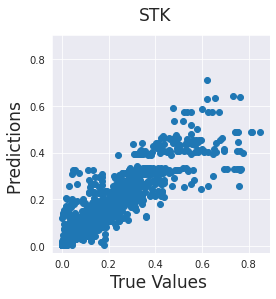

In [63]:
modelName = "STK"  #<--------------------
Arr = []
STK_model, _time, _cv = train_STK (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(STK_model, X_train, y_train) #<-----------
res2= test_model(STK_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_STK_train = res[-1]            #<--------------------
y_pred_STK_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_STK_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

In [64]:
modelName = "STK" #<-----------------

Arr = []
STK_Bias = train_bias_model(X_train,  y_pred_STK_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(STK_model, STK_Bias, X_train, y_train)) #<---------2--------
y_pred_STK_bias  =   testAllModel(STK_model, STK_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_STK_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (5546, 1)
testAllModel   (5546,) (5546, 1) (5546,)
R2_score:  0.9803212958836921 RMSE:  0.019884372601308088 MAE:  0.011385303829113848 MED_AE:  0.006274508584972115 MAPE:  6377419371.015359
testAllModel   (2377,) (2377, 1) (2377,)
R2_score:  0.8184042550314318 RMSE:  0.06258392199414319 MAE:  0.03397475039101489 MED_AE:  0.014234168287468749 MAPE:  35.847822071924426
R2_Score_Train             0.980321
RMSE_Train                 0.019884
MAE_Train                  0.011385
MdAE_Train                 0.006275
MAPE_Train        6377419371.015359
R2_Score_Test              0.818404
RMSE_Test                  0.062584
MAE_Test                   0.033975
MdAE_Test                  0.014234
MAPE_Test                 35.847822
Name: STK, dtype: object


In [65]:
df_results.to_csv("results_Regression_ordered_models.csv", sep=',')
df_results.sort_values('R2_Score_Test')

,Time_Train,CV_5,R2_Score_Train,RMSE_Train,MAE_Train,MdAE_Train,MAPE_Train,R2_Score_Test,RMSE_Test,MAE_Test,MdAE_Test,MAPE_Test
DT,114.665867,0.903452,1.0,0.0,0.0,0.0,0.000657,0.787551,0.067692,0.037411,0.017141,5.662369
RF,1703.010413,0.955296,0.982731,0.018627,0.00992,0.004561,29042518.527675,0.799482,0.065764,0.034813,0.014857,13.49366
STK,19492.689102,0.951214,0.978497,0.020786,0.011457,0.005859,5397457315.034118,0.811909,0.063693,0.034233,0.014553,30.583847
LGB,39991.448757,0.937717,0.95671,0.029492,0.017141,0.009016,5229036947.806897,0.825178,0.061406,0.033601,0.014206,23.685529
XGB,2507.629826,0.949848,0.981839,0.019102,0.011843,0.006484,1405546176.995237,0.831925,0.060209,0.031271,0.012449,9.280895
GBR,3290.196913,0.946655,0.970389,0.024391,0.01492,0.007856,2875806728.590448,0.855556,0.055816,0.027721,0.010478,16.367884
NN,240816.130977,0.941986,0.955253,0.029984,0.017015,0.008843,2983515964.708644,0.884278,0.049959,0.0288,0.014047,14.568279
LR,20.754565,0.934509,0.932325,0.036875,0.01978,0.009716,1437010191.809778,0.905548,0.045135,0.025148,0.011592,9.853659


In [ ]:
df_modified_results.to_csv("results_Regression_ordered_models2.csv", sep=',')
df_modified_results.sort_values('R2_Score_Test')

In [67]:
df = pd.DataFrame(y_test, columns = ["y_test"])
df['y_test']  = y_test
df["y_pred_linear_test"]  = y_pred_linear_test
df["y_pred_dt_test"] = y_pred_dt_test
df["y_pred_rf_test"] = y_pred_rf_test
df["y_pred_nn_test"] = y_pred_nn_test
df["y_pred_LGB_model_test"] = y_pred_LGB_test
df["y_pred_GBR_model_test"] = y_pred_GBR_test
df["y_pred_xgb_test"] = y_pred_xgb_test
df["y_pred_STK_test"] = y_pred_STK_test

df.to_csv("Ordered_allModels_Ytest_Ypredict_model.csv")

In [68]:
df = pd.DataFrame(y_test, columns = ["y_test"])
df['y_test']  = y_test
df["y_pred_linear_test"]  = y_pred_linear_bias
df["y_pred_dt_test"] = y_pred_dt_bias
df["y_pred_rf_test"] = y_pred_rf_bias
df["y_pred_nn_test"] = y_pred_nn_bias
df["y_pred_Lgb_model_test"] = y_pred_lgb_bias
df["y_pred_GBR_model_test"] = y_pred_GBR_bias
df["y_pred_XGboost_test"] = y_pred_xgb_bias
df["y_pred_STK_test"] = y_pred_STK_bias

df.to_csv("Ordered_allModels_Ytest_Ypredict_model2.csv")